In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from scipy.stats import rankdata
from matplotlib.patches import Patch

In [ ]:
# ATAC RANKED BOX

In [12]:
folder_path = '/mnt/c/Users/donna/Downloads/Thesis/tacje/celltype_level/coad_ranks.csv'
df = pd.read_csv(folder_path)

In [13]:
median_ranks = df.groupby('tissue')['rank'].median().sort_values()


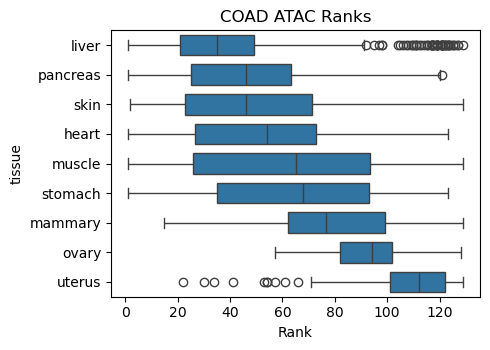

In [5]:
fragment_feature = "Max Wave Height"
plt.figure(figsize=(5, len(median_ranks) * 0.4))

sns.boxplot(
    x='rank',
    y='tissue',
    data=df,
    order=median_ranks.index,
    width=0.7
)

plt.xlabel('Rank')
plt.title(f'COAD ATAC Ranks')
plt.tight_layout()
plt.show()

In [ ]:
# SCRNA cORRS RANKED BOX

In [1]:
correlation_matrices_path = '/mnt/c/Users/donna/Downloads/Thesis/correlation_results/atac/celltype_level/healthy'

In [4]:
correlation_files = glob.glob(os.path.join(correlation_matrices_path, '*.csv'))

# Initialize an empty list to store data
correlation_data = []

# Loop through all files, read them, and add a tissue identifier column
for file_path in correlation_files:
    tissue_name = os.path.basename(file_path).replace('.csv', '')  # Extract tissue name
    df = pd.read_csv(file_path, index_col=0)
    # Melt the correlation matrix to long format, keeping only the lower triangle without the diagonal
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            correlation_data.append({
                'Tissue':      tissue_name,
                'Correlation': df.iloc[i, j]
            })

# Convert to DataFrame
correlation_df = pd.DataFrame(correlation_data)

In [6]:
correlation_df.to_csv('/mnt/c/Users/donna/Downloads/Thesis/funtest.csv')

In [7]:
# Loop over each entry in the 'Tissue' column of correlation_df
for idx, tissue in correlation_df['Tissue'].items():
    # Replace underscores with spaces and capitalize each word
    cleaned = tissue.replace('_', ' ').title()
    correlation_df.at[idx, 'Tissue'] = cleaned


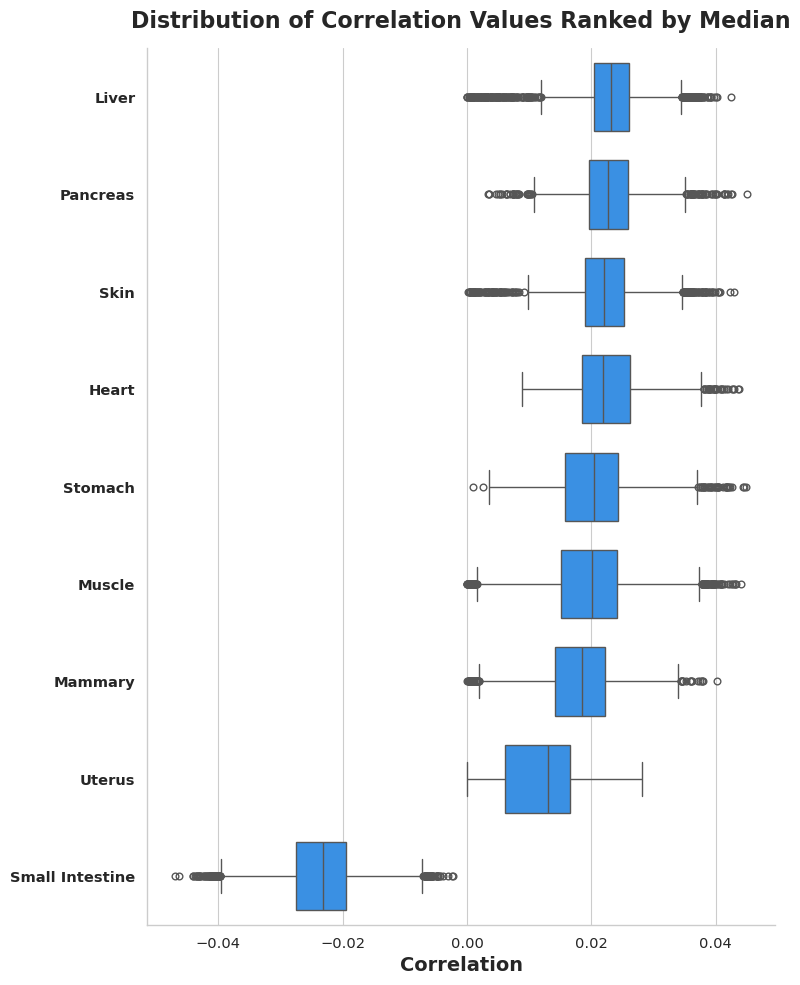

In [8]:
median_corr = (
    correlation_df
      .groupby('Tissue')['Correlation']
      .median()
      .sort_values(ascending=False)
)

# Plot
sns.set(style="whitegrid", context="paper", font_scale=1.2)
FIGSIZE = (8, 10)
SAVE_PATH = "/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/finals/atacrankedcors.png"
DPI = 600

plt.figure(figsize=FIGSIZE)
ax = sns.boxplot(
    x='Correlation',
    y='Tissue',
    data=correlation_df,
    order=median_corr.index,
    width=0.7,
    color="#1E90FF"   # bright blue
)

# Bold y‐tick labels
plt.setp(ax.get_yticklabels(), fontweight='bold')

# Title with "Ranked" in bold
ax.set_title('Distribution of Correlation Values Ranked by Median',
             fontsize=16, weight="bold", pad=15)

# Axis labels
ax.set_xlabel("Correlation", fontsize=14, weight= 'bold')
ax.set_ylabel("")  # no ylabel

# Clean up
sns.despine(trim=False, left=False, bottom=False)
plt.tight_layout()

# Save high-quality output
plt.savefig(SAVE_PATH, dpi=DPI, bbox_inches='tight')
plt.show()


In [ ]:
# CORR DISTRIBUTIE

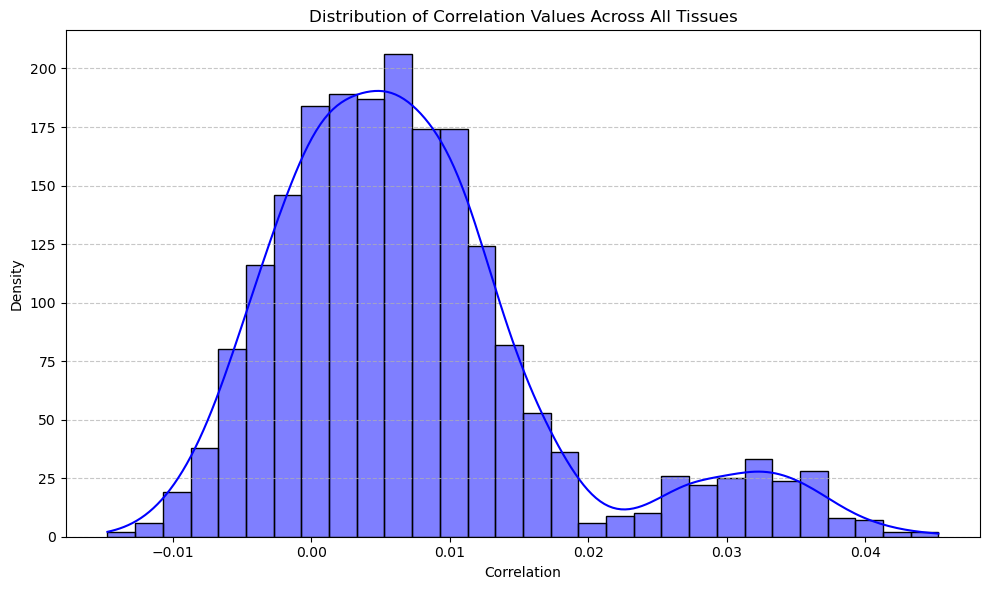

In [ ]:
plt.figure(figsize=(10, 6))
    
sns.histplot(correlation_df['Correlation'], bins=30, kde=True, color='b', edgecolor='black')

plt.title('Distribution of Correlation Values Across All Tissues')
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# STANLEY RNAKED BOX

In [35]:
csv_paths = [
    "/mnt/c/Users/donna/Downloads/Thesis/rankjes/paper_ranks/03x_matched_reference_ranks.csv",
    "/mnt/c/Users/donna/Downloads/Thesis/rankjes/paper_ranks/10x_matched_reference_ranks.csv",
    "/mnt/c/Users/donna/Downloads/Thesis/rankjes/paper_ranks/30x_matched_reference_ranks.csv"
]

In [36]:
dfs = []
for path in csv_paths:
    df = pd.read_csv(path)
    dfs.append(df)

In [37]:
df_all = pd.concat(dfs, ignore_index=True)

In [38]:
median_order = (
    df_all.groupby("tissue")["rank"]
    .median()
    .sort_values(ascending=True)
    .index
    .tolist()
)

In [39]:
df_all['tissue'] = (
    df_all['tissue']
      .str.replace('_', ' ')
      .str.title()
)

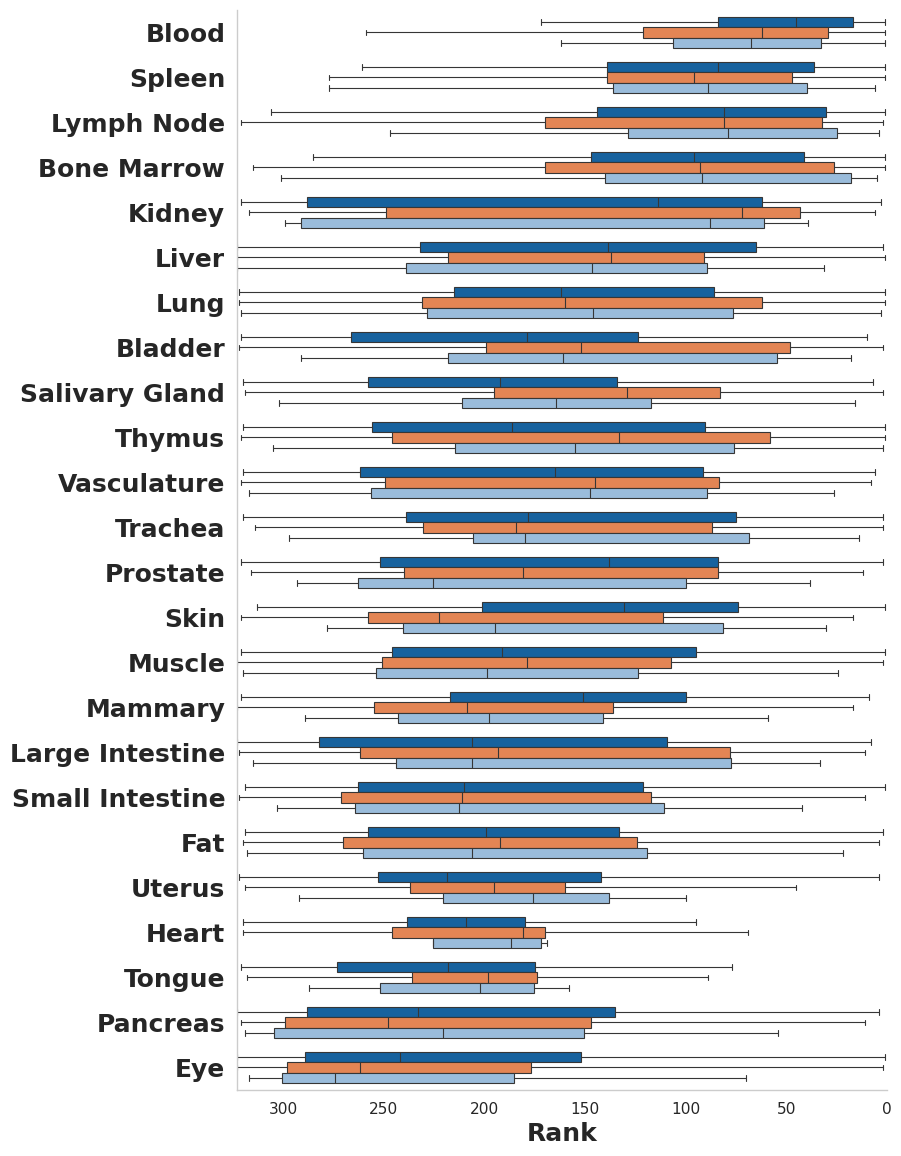

In [114]:
sns.set(style="whitegrid", context="paper", font_scale=1.2)
FIGSIZE = (10, 12)
AX_POS = [0.25, 0.05, 0.65, 0.9]  # [left, bottom, width, height]
SAVE_PATH = "/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/finals/paper_rank_boxplot.png"
LEGEND_PATH = "/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/finals/paper_rank_boxplot_legend.png"
DPI = 600

# --- Order tissues by mean rank ---
mean_order = (
    df_all.groupby("tissue")["rank"]
    .mean()
    .sort_values(ascending=True)
    .index
    .tolist()
)

# --- Setup figure and axis ---
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.set_position(AX_POS)

# --- Plot ---
plot = sns.boxplot(
    data=df_all,
    y="tissue",
    x="rank",
    hue="depth",                    # Omit if not needed
    orient="h",
    width=0.7,
    fliersize=0,
    linewidth=0.8,
    palette={"<0.3X": "#0064b5", "10X": "#fb7e3c", "30X": "#8fbce6"},  # Use `color` if no hue
    order=mean_order,
    ax=ax
)

# --- Legend Handling ---
if ax.get_legend() is not None:
    ax.get_legend().remove()
    ax.set_position(AX_POS)  # Reset axis size after removing legend

# --- Axis styling ---
ax.set_xlim(323, 0)
ax.set_xlabel("Rank", fontsize=18, weight = 'bold')
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=11)
ax.grid(False, axis='x')
sns.despine(left=False, bottom=False)
plt.setp(ax.get_yticklabels(), fontweight='bold')

# --- Save the plot with tight bounding box ---
fig.savefig(SAVE_PATH, dpi=DPI, bbox_inches='tight', pad_inches=0)
plt.show()

# --- Save separate legend (optional) ---
fig_legend, ax_legend = plt.subplots(figsize=(2, 2))
ax_legend.axis("off")
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=label)
    for label, color in {"<0.3X": "#0064b5", "10X": "#fb7e3c", "30X": "#8fbce6"}.items()
]
ax_legend.legend(
    handles=legend_elements,
    title="Coverage Depth",
    loc='center',
    frameon=False,
    fontsize=11,
    title_fontsize=12
)
fig_legend.savefig(LEGEND_PATH, dpi=DPI, bbox_inches='tight')
plt.close(fig_legend)

In [ ]:
# DT RANKED BOX

In [115]:
my_df = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/rankjes/abscor_ranks_per_feature/cov_spread_rank_results.csv')

In [116]:
# Replace underscores with spaces and capitalize each word in the 'tissue' column
my_df['tissue'] = (
    my_df['tissue']
      .str.replace('_', ' ')
      .str.title()
)


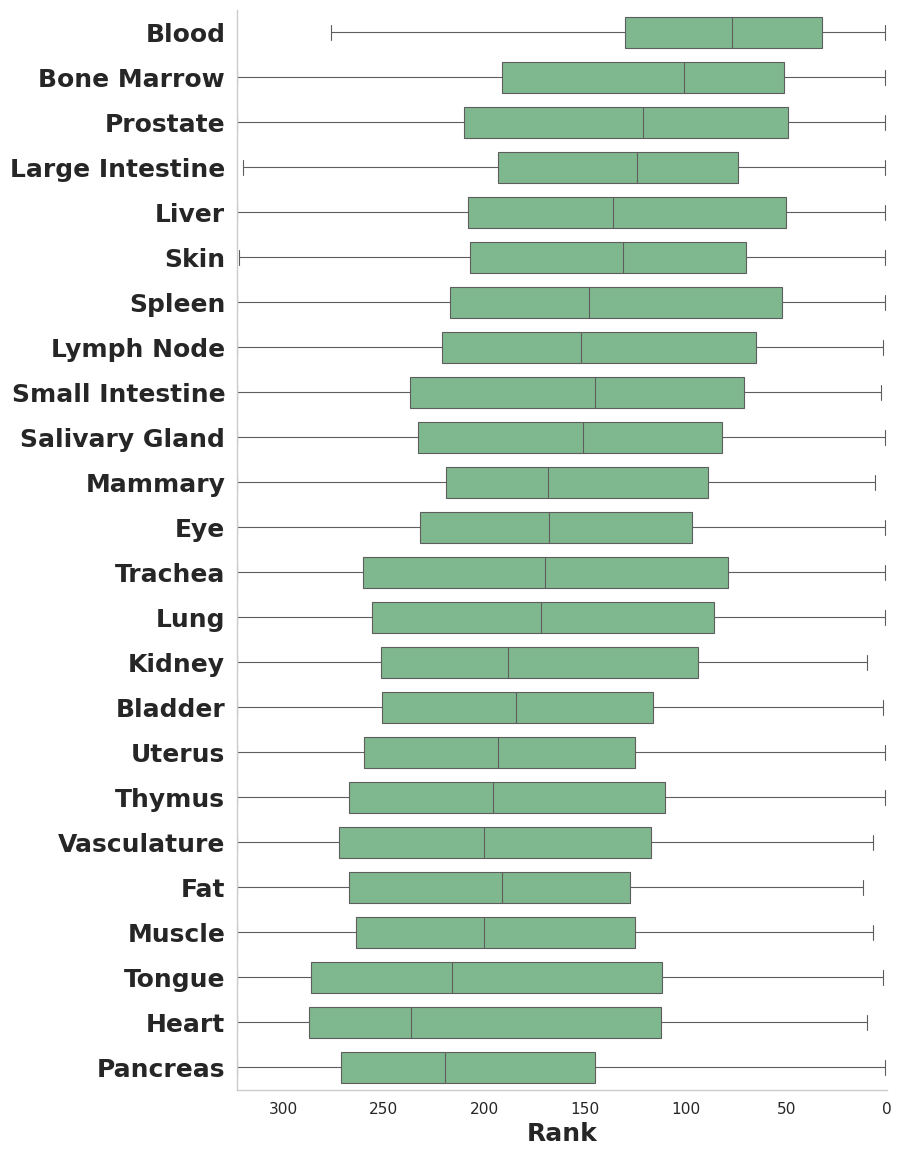

In [120]:
sns.set(style="whitegrid", context="paper", font_scale=1.2)
FIGSIZE = (10, 12)
AX_POS = [0.25, 0.05, 0.65, 0.9]
SAVE_PATH = "/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/finals/myrank_boxplot.png"
DPI = 600

# --- Order tissues by mean rank (ascending: highest rank on top) ---
mean_order_my = (
    my_df.groupby("tissue")["rank"]
    .mean()
    .sort_values(ascending=True)
    .index
    .tolist()
)

# --- Create figure and axis ---
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.set_position(AX_POS)

# --- Create boxplot (no hue) ---
sns.boxplot(
    data=my_df,
    y="tissue",
    x="rank",
    orient="h",
    width=0.7,
    fliersize=0,
    linewidth=0.8,
    color="#76C08A",
    order=mean_order_my,
    ax=ax
)

# --- Legend cleanup (should be none, but keep safe check) ---
if ax.get_legend() is not None:
    ax.get_legend().remove()
    ax.set_position(AX_POS)

# --- Axis styling ---
# ax.set_title("scRNA", fontsize=20, fontweight='bold', pad=10)
ax.set_xlim(323, 0)
ax.set_xlabel("Rank", fontsize=18, weight = 'bold')
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=11)
ax.grid(False, axis='x')

plt.setp(ax.get_yticklabels(), fontweight='bold')

sns.despine(left=False, bottom=False)

# --- Save figure tightly cropped and pixel-perfect ---
fig.savefig(SAVE_PATH, dpi=DPI, bbox_inches='tight', pad_inches=0)
plt.show()


In [ ]:
# RANKED BOX MET NROMALIZED RANKS VOOR ATAC VS SCRNA REF PLOT

In [131]:
scrna_df = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/rankjes/cov_spread_ranks_atacmatch.csv')

In [121]:
atac_df = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/tacje/celltype_level/healthy_ranks_zonder_ovary.csv')

In [132]:
# Replace underscores with spaces and capitalize each word in the 'tissue' column
scrna_df['tissue'] = (
    scrna_df['tissue']
      .str.replace('_', ' ')
      .str.title()
)


/tmp/ipykernel_27821/776645602.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels, fontsize=25, fontweight='bold')


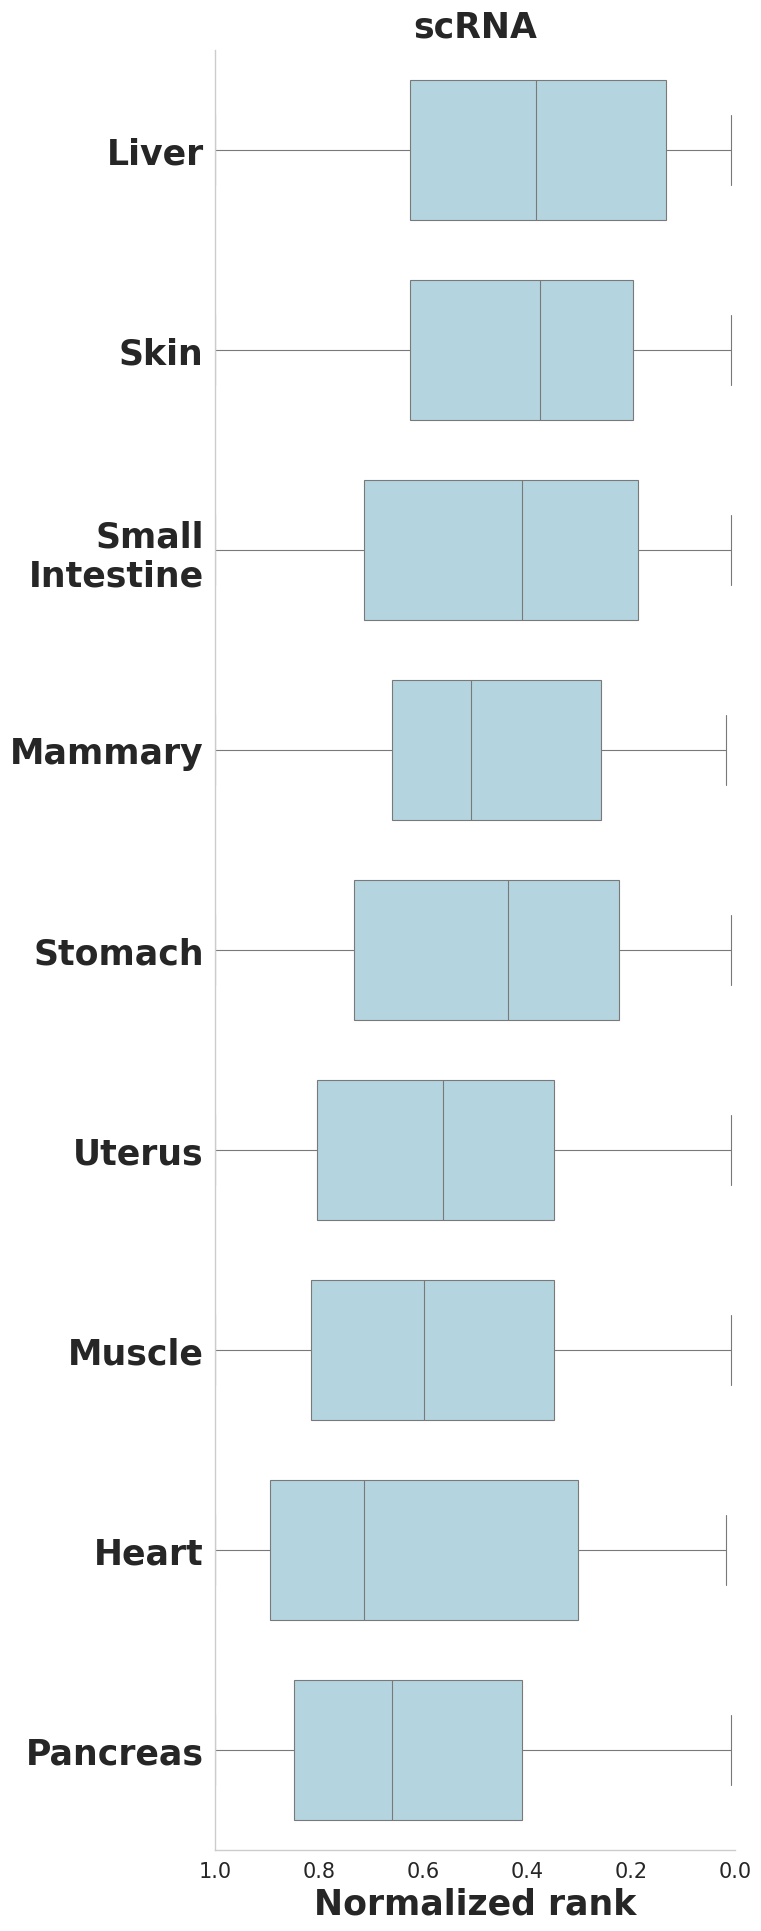

In [133]:
max_rank = scrna_df['rank'].max()
scrna_df['norm_rank'] = scrna_df['rank'] / max_rank

# Order tissues by mean normalized rank (ascending)
mean_order = (
    scrna_df
      .groupby('tissue')['norm_rank']
      .mean()
      .sort_values(ascending=True)
      .index
      .tolist()
)

sns.set(style="whitegrid", context="paper", font_scale=1.2)
FIGSIZE = (8, 20)
AX_POS = [0.25, 0.05, 0.65, 0.9]
SAVE_PATH = "/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/finals/healthyscrna_atacmatch.png"
DPI = 600
BOX_COLOR = "#ADD8E6"

# Create figure and axis
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111)
ax.set_position(AX_POS)

sns.boxplot(
    data=scrna_df,
    y="tissue",
    x="norm_rank",
    orient="h",
    width=0.7,
    fliersize=0,
    linewidth=0.8,
    color=BOX_COLOR,
    order=mean_order,
    ax=ax
)

# --- Wrap "small intestine" into two lines and title-case all labels ---
new_labels = []
for txt in ax.get_yticklabels():
    lbl = txt.get_text().replace('_', ' ').title()
    if lbl == "Small Intestine":
        lbl = "Small\nIntestine"
    new_labels.append(lbl)
ax.set_yticklabels(new_labels, fontsize=25, fontweight='bold')

# --- Axis styling ---
ax.set_title("scRNA", fontsize=25, fontweight='bold', pad=10)
ax.set_xlim(1.0, 0.0)  # invert so that 1 (best) is on the left
ax.set_xlabel("Normalized rank", fontsize=25, fontweight='bold')
ax.set_ylabel("")
ax.tick_params(axis='x', labelsize=15)
ax.grid(False, axis='x')

sns.despine(left=False, bottom=False)

# Save figure
fig.savefig(SAVE_PATH, dpi=DPI, bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
# GEEN IDEE WHAT DIT HIER ONDER IS :)

In [54]:
median_order_lower = [t.lower() for t in median_order]
order = [t for t in median_order if t in df_all["tissue"].unique()]


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), sharey=True)
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# --------- Left plot: df_all with depths ----------
palette = {
    "<0.3X": "#80bdff",  
    "10X":   "#d5d5cf", 
    "30X":   "#FFAA3C"  
}

sns.boxplot(
    data=df_all,
    y="tissue",
    x="rank",
    hue="depth",
    orient="h",
    width=0.7,
    fliersize=0,
    linewidth=0.8,
    palette=palette,
    order=median_order,
    ax=ax1
)

ax1.invert_xaxis()
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_xlabel("Median Cell Type Rank", fontsize=13)
ax1.set_ylabel("")
ax1.set_title("Paper Data by Coverage Depth", fontsize=15, pad=15)
ax1.grid(False, axis='x')
sns.despine(left=True, bottom=True, ax=ax1)

# Move legend outside
legend = ax1.legend(title="Coverage Depth", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
for text in legend.get_texts():
    text.set_fontsize(11)
legend.get_title().set_fontsize(12)

# --------- Right plot: my_df with single neutral color ----------
sns.boxplot(
    data=my_df,
    y="tissue",
    x="rank",
    orient="h",
    width=0.7,
    fliersize=0,
    linewidth=0.8,
    color="#7ea6e0",  # darker, neutral blue
    order=median_order,  # use same order for direct comparison
    ax=ax2
)

ax2.invert_xaxis()
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("Median Cell Type Rank", fontsize=13)
ax2.set_ylabel("")
ax2.set_title("scRNA Reference Dataset", fontsize=15, pad=15)
ax2.grid(False, axis='x')
sns.despine(left=True, bottom=True, ax=ax2)

# Tweak and save
plt.tight_layout()
plt.savefig("/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/finals/combined_boxplots.png", dpi=600, bbox_inches='tight')
plt.show()

_IncompleteInputError: incomplete input (2440500505.py, line 39)